# Object Oriented Programming 2 - examples and APIs


## Tasks Today:

   

1) <b>Shopping Cart Example</b> <br>
2) <b>Requests and the pokemon API </b> <br>
 

# Goal 
### build a shopping cart program with prices and quantities using objects and a dictionary

In [22]:
from IPython.display import clear_output as clear
# Create a class called cart that retains items and has methods to add, remove, and show

class Cart():
    def __init__(self):
        self.items = {}
        
    def add(self):
        clear()
        new_item = input("What do you want to get?")
        quantity = int(input(f"How many {new_item}s do you want?"))
        if new_item not in self.items.keys():
            self.items[new_item] = quantity
        else:
            self.items[new_item] += quantity
        print(f"{quantity} {new_item}s have been added to the cart.")
        
    def remove(self):
        clear()
        discard = input("What would you like to discard?")
        quantity = int(input(f"How many {discard}s would you like to put back?"))
        try:
            self.items[discard] -= quantity
            if self.items[discard] <= 0:
                del self.items[discard]
            print(f"{quantity} {discard}s have been removed.")
        except:
            print(f"{discard} was not in your cart.")
        self.show()
        #TODO: create a show method
        
    def show(self):
        print("Your cart contains the items below")
        print("  Item  |  Quantity")
        for item,quantity in self.items.items():
            print(f"{item}  |  {quantity}")
            
    def checkout(self):
        clear()
        if not self.items:
            print('Please come back and buy things.')
        else: 
            print('Thanks for shopping')
            self.show()
            
# Contorl the logic and flow of our program
class Main:
    def showInstructions(self):
        print("""
        Welcome to the Shopping Program:
        Options:
        [1] Show the Current Cart
        [2] Add Item
        [3] Remove Item
        [4] Quit
        """)
    def run(self):
        my_cart = Cart()
        
        while True:
            self.showInstructions()
            choice = input("What would you like to do?")
            if choice == '1':
                if my_cart.items:
                    my_cart.show()
                else:
                    print('Your Cart is Empty...')
            elif choice == '2':
                my_cart.add()
            elif choice == '3':
                if my_cart.items:
                    my_cart.remove()
                else:
                    print("Your cart is empty... how are you going ot remove nothing???")
            elif choice == '4':
                my_cart.checkout()
                break
            else:
                print("Invalid Response... Please select an option above.")
                
my_prog = Main()
my_prog.run()

Please come back and buy things.


In [23]:
def remove(self):
        clear()
        discard = input("What would you like to discard?")
        quantity = int(input(f"How many {discard}s would you like to put back?"))
        if discard in self.items.keys():
            self.items[discard] -= quantity
            if self.items[discard] <= 0:
                del self.items[discard]
            print(f"{quantity} {discard}s have been removed.")
        else:
            print(f"{discard} was not in your cart.")
        self.show()

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [24]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [25]:
# making an API call
import requests

r = requests.get("https://pokeapi.co/api/v2/pokemon/zapdos")
if r.status_code == 200:
    data = r.json()
else:
    print(f"Error Status Code: {r.status_code}")
    
print(data.keys())   
    

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])


### Display a Pokemon's name, weight, abilities, and types

In [26]:
# get the name
name = data['name']
print(name)



zapdos


In [19]:
print(data['types'][0]['type']['name'])

electric


In [20]:
# get types
types = [pokemon['type']['name'] for pokemon in data['types']]
print(types)

['electric', 'flying']


In [21]:
# get weight
weight = data['weight']
print(weight)

526


In [27]:
# get abilities
abilities = [pokemon['ability']['name'] for pokemon in data['abilities']]
print(abilities)

['pressure', 'static']


In [28]:
# Create a structure for a single pokemon
first_pokemon = {
    "name": "",
    "abilities": [],
    "weight": 0,
    "types":[]
}

In [29]:
zapdos = {
    "name":name,
    "abilites":abilities,
    "weight":weight,
    "types":types
}
zapdos

{'name': 'zapdos',
 'abilites': ['pressure', 'static'],
 'weight': 526,
 'types': ['electric', 'flying']}

#### Create a function to Pull in your own Pokemon's data 

In [30]:
def poke_api_call(pokemon_name_or_id):
    r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{pokemon_name_or_id}")
    if r.status_code == 200:
        data = r.json()
        
        name = data['name']
        types= [pokemon['type']['name'] for pokemon in data['types']]
        abilities = [poke['ability']['name'] for poke in data['abilities']]
        weight = data['weight']
        
        pokemon_x = {
            "name":name,
            "abilites":abilities,
            "weight":weight,
            "types":types
        }
        return pokemon_x
    
    else:
        print(f"Error Status Code: {r.status_code}")
   
    
    
zapdos = poke_api_call('zapdos')
zapdos

{'name': 'zapdos',
 'abilites': ['pressure', 'static'],
 'weight': 526,
 'types': ['electric', 'flying']}

Choose your pokemon

In [31]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']


#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [32]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}


for member in your_team:
    poke_stats = poke_api_call(member)
    my_six_pokemon[member] = poke_stats #what is happening here

print(my_six_pokemon)

their_six_pokemon = {}
for member in random_team:
    poke_stats = poke_api_call(member)
    their_six_pokemon[poke_stats['name'].title()] = poke_stats #what is happening here

print(their_six_pokemon)

{'electabuzz': {'name': 'electabuzz', 'abilites': ['static', 'vital-spirit'], 'weight': 300, 'types': ['electric']}, 'haunter': {'name': 'haunter', 'abilites': ['levitate'], 'weight': 1, 'types': ['ghost', 'poison']}, 'tyranitar': {'name': 'tyranitar', 'abilites': ['sand-stream', 'unnerve'], 'weight': 2020, 'types': ['rock', 'dark']}, 'blaziken': {'name': 'blaziken', 'abilites': ['blaze', 'speed-boost'], 'weight': 520, 'types': ['fire', 'fighting']}, 'marowak': {'name': 'marowak', 'abilites': ['rock-head', 'lightning-rod', 'battle-armor'], 'weight': 450, 'types': ['ground']}, 'dragonair': {'name': 'dragonair', 'abilites': ['shed-skin', 'marvel-scale'], 'weight': 165, 'types': ['dragon']}}
{'Avalugg': {'name': 'avalugg', 'abilites': ['own-tempo', 'ice-body', 'sturdy'], 'weight': 5050, 'types': ['ice']}, 'Magby': {'name': 'magby', 'abilites': ['flame-body', 'vital-spirit'], 'weight': 214, 'types': ['fire']}, 'Pineco': {'name': 'pineco', 'abilites': ['sturdy', 'overcoat'], 'weight': 72, '

## Lets create a class called 'Pokemon' and create our pokemon as instances

In [33]:
class Pokemon():
    
    def __init__(self, name):
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = 0
        self.poke_api_call()
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            data = r.json()

            self.name = data['name']
            self.types= [pokemon['type']['name'] for pokemon in data['types']]
            self.abilities = [poke['ability']['name'] for poke in data['abilities']]
            self.weight = data['weight']

        else:
            print(f"Error Status Code: {r.status_code}")
            
    # What happend when you print
    def __repr__(self):
        return f"You caught a {self.name}!"

### Let's Catch some Pokemon

In [34]:
pikachu = Pokemon('pikachu')
print(pikachu)
print(type(pikachu))
print(pikachu.__dict__)

You caught a pikachu!
<class '__main__.Pokemon'>
{'name': 'pikachu', 'types': ['electric'], 'abilities': ['static', 'lightning-rod'], 'weight': 60}


In [35]:
pokedex = {}
for member in your_team:
    pokeball = Pokemon(member)
    pokedex[member.title()] = pokeball

pokedex

{'Electabuzz': You caught a electabuzz!,
 'Haunter': You caught a haunter!,
 'Tyranitar': You caught a tyranitar!,
 'Blaziken': You caught a blaziken!,
 'Marowak': You caught a marowak!,
 'Dragonair': You caught a dragonair!}

## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

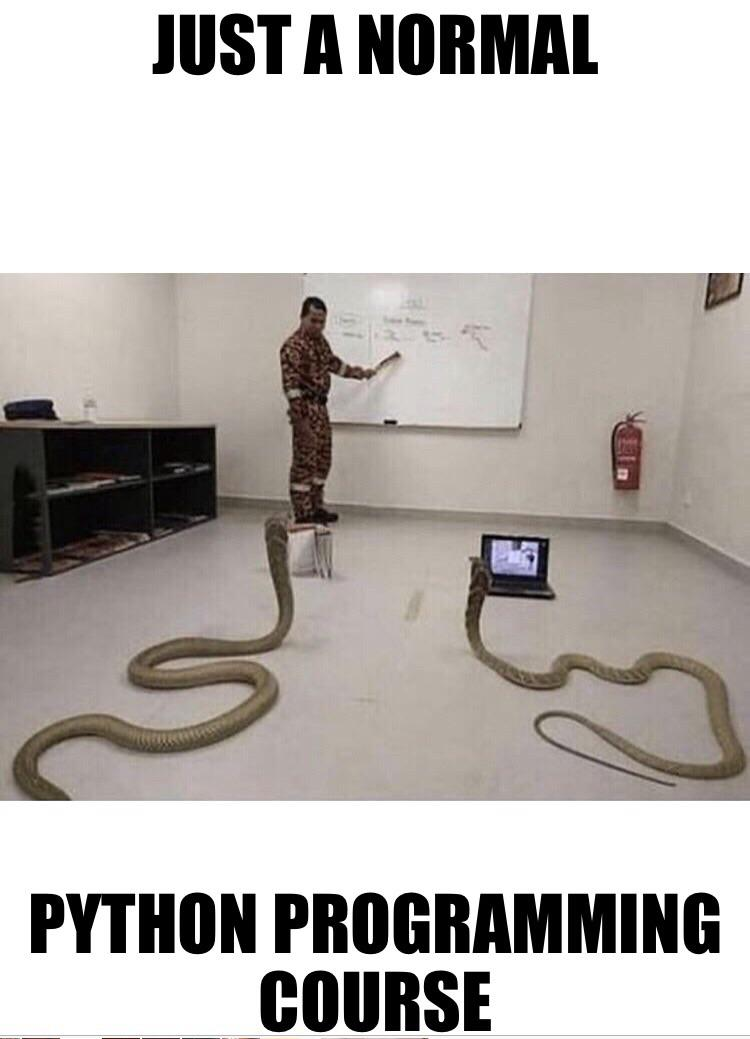

In [36]:
# Display an image in Jupyter notebook
from IPython.display import Image

display(Image( 'https://i.redd.it/45n4mhusa8l41.jpg', width = 300))


In [47]:
# Terrells code for image
class Pokemon(Evolver, Move_Tutor):
    def __init__(self,name):
        Move_Tutor.__init__(self)
        self.name = name
        self.types = []
        self.abilities = []
        self.weight = 0
        self.image = ''
        self.poke_api_call()
        print(self)
        self.display()
        
        
    def poke_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            data = r.json()

            self.name = data['name']
            self.types = [pokemon['type']['name'] for pokemon in data['types']]
            self.abilities = [poke['ability']['name'] for poke in data['abilities']]
            self.weight = data['weight']
            self.image = data['sprites']['other']['official-artwork']['front_default']

        else:
            print(f"Error Status Code: {r.status_code}")
            
    def display(self):
        display(Image(self.image))
    # What happens when you print
    def __repr__(self):
        return f"You caught a {self.name}!"



You caught a charmander!


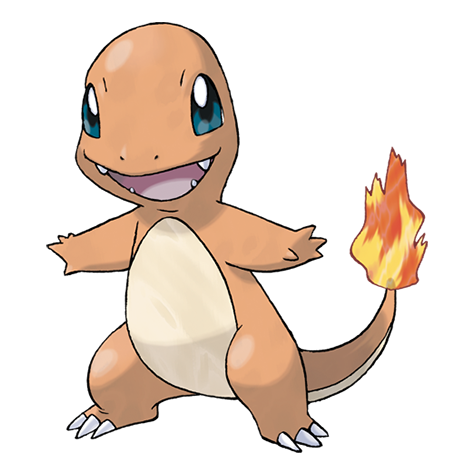

In [48]:
charmander = Pokemon('charmander')



In [ ]:
# Calling our new method
charmander.display()

In [49]:
charmander.evolve()

TypeError: 'dict' object is not callable

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [46]:
# Mixins

from time import sleep

class Evolver:
    
    def evolve(self):
        #API call to pokemon-species endpoint
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon-species/{self.name}")
        if r.status_code != 200:
            print(f"Species Error Status : {r.status_code}")
            return
        else:
            pokemon_species = r.json()
        
        r2 = requests.get(pokemon_species['evolution_chain']['url'])
        if r2.status_code != 200:
            print(f"Evolution Shain Error Status : {r2.status_code}")
            return
        else:
            ev_chain = r2.json()
            ev_chain = ev_chain('chain')
        
        #First Evolution
        base_name = ev_chain['species']['name']
        
        evolution = ev_chain["evolves_to"][0]
        
        #form 2
        evolution_name = evolution['species']['name']
        
        if base_name == self.name:
            pass
        elif evolution_name == self.name:
            evolution_name = evolution['evolves_to'][0]['species']['name']
        else:
            print(f"You can't evolve your {self.name} anymore.")
            
        print("......")
        sleep(1)
        print(f"Your {self.name} is evolving?!")
        self.display()
        sleep(1)
        print(".........")
        self.name = evolution_name
        self.poke_api_call()
        self.display()
        

Now let's evolve a few

#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [39]:
class Move_Tutor:
    def __init__(self):
        self.move_list = []
        
        
    
    def moves_api_call(self):
        r = requests.get(f"https://pokeapi.co/api/v2/pokemon/{self.name}")
        if r.status_code == 200:
            data = r.json()
        
        else:
            print(f"Error Status Code: {r.status_code}")
            
        
            
    def possible_moves(self):
#         self.possible_moves = data['moves']
        self.possible_moves = [pokemon['move']['name'] for pokemon in data['moves']]
        return self.possible_moves
        
        
    def teach_move(self):
        move = input(f"what move would you like {self.name} to learn?")
        if move not in self.possible_moves:
            print(f"{self.name} can't learn that move.")
        else:
            if move not in self.move_list:
                if len(self.move_list) > 3:
                    print(f"Your {self.name} already knows 4 moves. \n {self.move_list}")
                    diff_move = input(f"\n What move would you like to replace with {move}?")
                    self.move_list.remove(diff_move)
                    self.move_list.append(move)
                else:
                    self.move_list.append(move)
            else:
                print(f"Your {self.name} already knows that move.")
            
            
        
    def show_moves(self):
        return self.move_list
    
        
        

In [50]:
charmander.possible_moves()

['razor-wind',
 'whirlwind',
 'fly',
 'headbutt',
 'take-down',
 'double-edge',
 'leer',
 'roar',
 'hyper-beam',
 'peck',
 'drill-peck',
 'thunder-shock',
 'thunderbolt',
 'thunder-wave',
 'thunder',
 'toxic',
 'agility',
 'rage',
 'mimic',
 'double-team',
 'light-screen',
 'reflect',
 'bide',
 'swift',
 'sky-attack',
 'flash',
 'rest',
 'substitute',
 'snore',
 'curse',
 'protect',
 'mud-slap',
 'zap-cannon',
 'detect',
 'sandstorm',
 'endure',
 'swagger',
 'steel-wing',
 'sleep-talk',
 'return',
 'frustration',
 'baton-pass',
 'hidden-power',
 'twister',
 'rain-dance',
 'sunny-day',
 'ancient-power',
 'rock-smash',
 'heat-wave',
 'hail',
 'facade',
 'charge',
 'secret-power',
 'weather-ball',
 'air-cutter',
 'signal-beam',
 'aerial-ace',
 'shock-wave',
 'roost',
 'natural-gift',
 'pluck',
 'tailwind',
 'u-turn',
 'brave-bird',
 'giga-impact',
 'defog',
 'discharge',
 'charge-beam',
 'ominous-wind',
 'round',
 'sky-drop',
 'volt-switch',
 'wild-charge',
 'hurricane',
 'confide',
 'eer

In [61]:
charmander.teach_move()


what move would you like charmander to learn?rage
Your charmander already knows 4 moves. 
 ['charge', 'toxic', 'mimic', 'thunderbolt']

 What move would you like to replace with rage?mimic


In [63]:
charmander.show_moves()


['charge', 'toxic', 'thunderbolt', 'rage']